In [37]:
%matplotlib notebook
import numpy as np
import yaml
from matplotlib import pyplot as plt
from matplotlib import cm

from utils import load_runs, is_crystal

In [38]:
d = load_runs([131, 133], one_color=True) # onecolor water



--- LOADED 2 RUNS --
pump_mag                  : (21818,)
gdet_mJ                   : (21818,)
radial_profile_qvalues    : (500,)
probe_energy              : (21818,)
pp_delay                  : (21818,)
pump_energy               : (21818,)
probe_mag                 : (21818,)
radial_profile            : (21818, 500)


In [39]:
gdet = np.nan_to_num(d['gdet_mJ'])

plt.figure()
plt.subplot(131)
plt.plot(gdet)
plt.subplot(132)
plt.hist(gdet, 100)
plt.subplot(133)
plt.hist(d['probe_mag'], np.linspace(1e6, 1e7, 100))
plt.show()

<IPython.core.display.Javascript object>

In [40]:
keep = (gdet > 0) * (d['probe_mag'] < 1e7)
gdet_s      = gdet[keep]
probe_mag_s = d['probe_mag'][keep]

In [64]:
z = np.polyfit(probe_mag_s, gdet_s, 3)
p = np.poly1d(z)

In [65]:
# linear passing through zero...
m_hat = np.mean(gdet_s / probe_mag_s)
print(m_hat)
print(p[1])
print(m_hat / p[1]) # ratio between the two methods...

1.60324933931e-07
1.03007058605e-07
1.55644609314


<IPython.core.display.Javascript object>


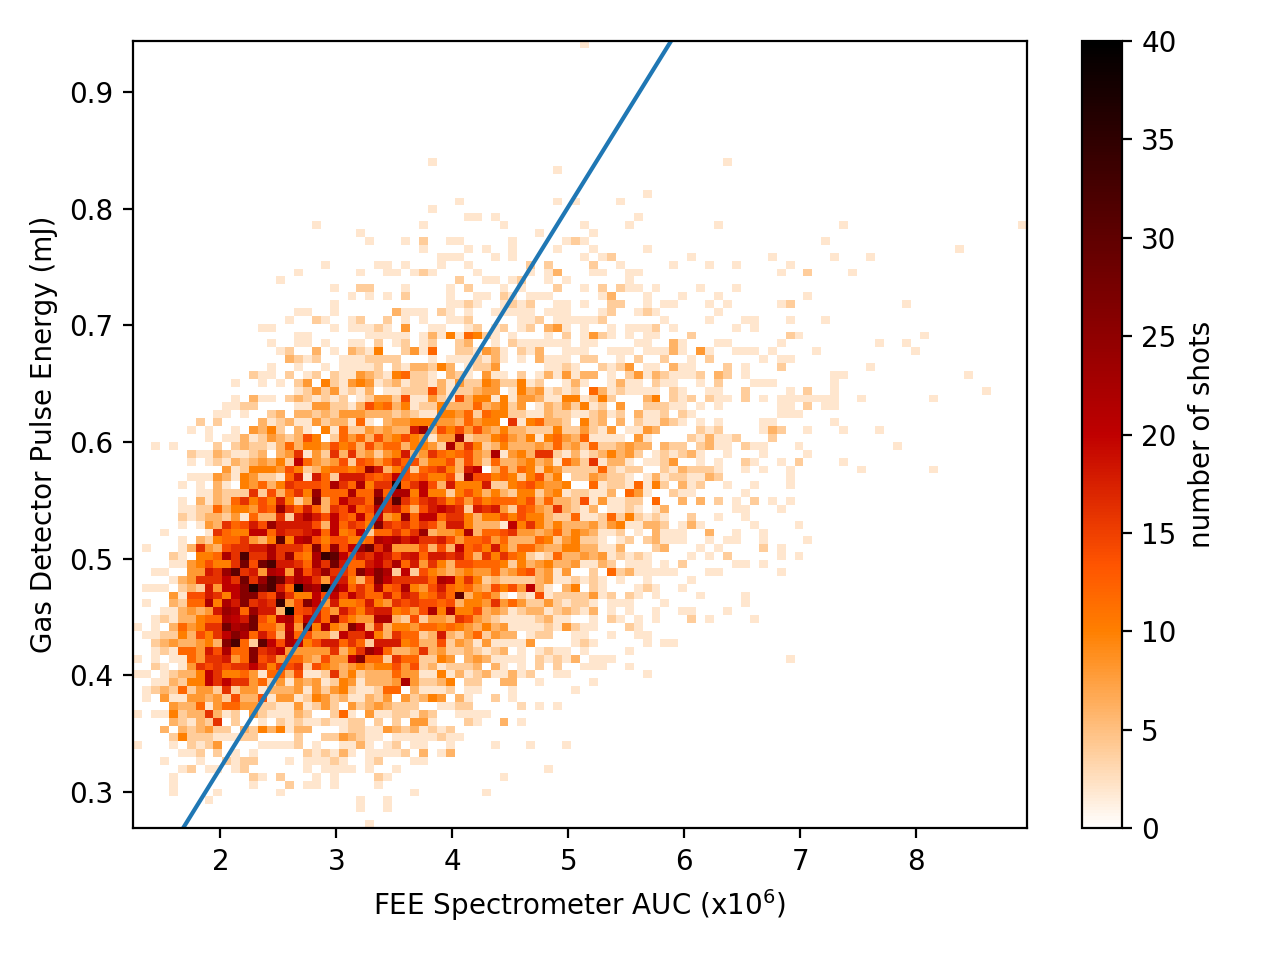

In [72]:
x = np.linspace(1e6, 1e7, 100)

plt.figure()
plt.hist2d(probe_mag_s / 1e6, gdet_s, 100, cmap='gist_heat_r')

plt.plot(x/1e6, m_hat * x)

plt.colorbar(label='number of shots')
plt.xlabel('FEE Spectrometer AUC (x$10^6$)')
plt.ylabel('Gas Detector Pulse Energy (mJ)')

plt.tight_layout()
plt.savefig('figures/power_calibration.pdf')
plt.show()

In [75]:
spot_size = 16000.0 / 1e12 # nm^2 --> mm^2
print(m_hat / spot_size, 'auc_to_mJmm2')
print(m_hat / spot_size, 'auc_to_mJnm2')

(10.020308370692518, 'auc_to_mJmm2')
(1.0020308370692519e-05, 'auc_to_kJmm2')
